In [48]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from utils2 import *
import umap

### AUTORELOAD
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
# data = pd.read_csv('Data\\New_Data\\project_data_cleaned_noreturnincons_impute2_wzipid_no0_out.csv')
data = pd.read_csv('Data\\New_Data\\project_data_cleaned_noreturnincons_impute2_wzipid_no0_out_perc.csv')

In [50]:
preference_metrics_perc = ['percentage_beer', 'percentage_bottled_water', 'percentage_bread', 'percentage_meat', 'percentage_dairy', 'percentage_fresh_foods', 'percentage_frozen_foods', 'percentage_fruit_beverages', 'percentage_pastry', 'percentage_sodas', 'percentage_toiletries', 'percentage_veggies', 'percentage_wines']
preference_metrics = ['beer', 'bottled_water', 'bread', 'meat', 'dairy', 'fresh_foods', 'frozen_foods', 'fruit_beverages', 'pastry', 'sodas', 'toiletries', 'veggies', 'wines']

In [51]:
preference_perc = data[preference_metrics_perc]


In [52]:
preference_all = data[preference_metrics_perc + preference_metrics]
cop = preference_all.copy()

# Preference Clustering

Scale the data

In [53]:
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()

In [54]:
pref_no_scl = preference_perc.copy()
pref_st_scl = standard.fit_transform(preference_perc)
pref_mm_scl = minmax.fit_transform(preference_perc)
pref_rb_scl = robust.fit_transform(preference_perc)

In [55]:
preference_no_scl = preference_perc.copy()
preference_no_scl[preference_metrics_perc] = pref_no_scl

preference_st_scl = preference_perc.copy()
preference_st_scl[preference_metrics_perc] = pref_st_scl

preference_mm_scl = preference_perc.copy()
preference_mm_scl[preference_metrics_perc] = pref_mm_scl

preference_rb_scl = preference_perc.copy()
preference_rb_scl[preference_metrics_perc] = pref_rb_scl

# Compare test

In [60]:
from sklearn.base import clone

## Some functions we need
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst

def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


In [61]:
def get_r2_df(df, feats, kmeans_model, hierar_model):
  # Obtaining the R² scores for each cluster solution

  r2_scores = {}
  r2_scores['kmeans'] = get_r2_scores(df[feats], kmeans_model)

  for linkage in ['complete', 'average', 'single', 'ward']:
      r2_scores[linkage] = get_r2_scores(
          df[feats], hierar_model.set_params(linkage=linkage)
      )

  return pd.DataFrame(r2_scores)

In [62]:
def plot_r2_scores(r2_scores,
                   plot_title="Preference Variables:\nR² plot for various clustering methods\n",
                   legend_title="Cluster methods"):
  # Visualizing the R² scores for each cluster solution on demographic variables
  pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

  plt.title(plot_title, fontsize=21)
  plt.legend(title=legend_title, title_fontsize=11)
  plt.xlabel("Number of clusters", fontsize=13)
  plt.ylabel("R² metric", fontsize=13)
  plt.show()

In [63]:
kmeans = KMeans(init='k-means++', n_init=20, random_state=1)

hierarchical = AgglomerativeClustering(metric='euclidean')

In [65]:
demog_r2_scores = get_r2_df(preference_st_scl.sample(frac=0.2, random_state=1), preference_metrics_perc, kmeans, hierarchical)
demog_r2_scores

,kmeans,complete,average,single,ward
2,0.225659,0.027282,0.012140,0.005296,0.211954
3,0.375663,0.038105,0.035532,0.010058,0.356071
4,0.430428,0.073328,0.036101,0.010796,0.417074
5,0.481720,0.076756,0.038390,0.011276,0.465328
6,0.529257,0.083567,0.067427,0.013018,0.512246
7,0.562379,0.088926,0.069393,0.013586,0.544459
8,0.587139,0.090713,0.069981,0.027463,0.572473
9,0.607365,0.094505,0.070608,0.027513,0.594456


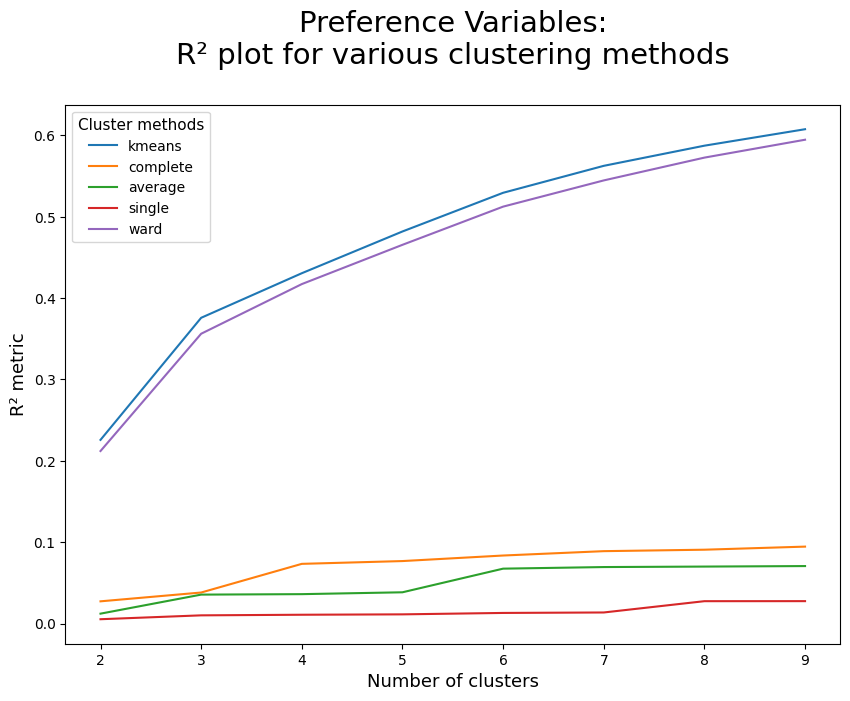

In [66]:
plot_r2_scores(demog_r2_scores)

# K-Means

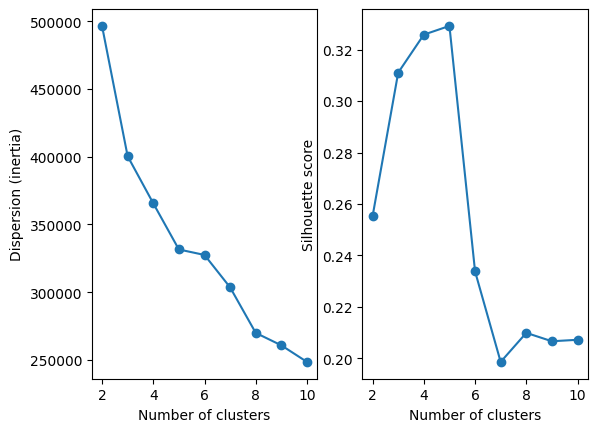

In [8]:
plot_inertia_and_silhouette(preference_st_scl.sample(frac=0.4, random_state=1), 2, 10)

In [56]:
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init=10,  random_state = 1).fit(preference_st_scl)
preference_all['st_kmeans5'] = kmeans.predict(preference_st_scl)

C:\Users\ritaf\AppData\Local\Temp\ipykernel_34588\3130928413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preference_all['st_kmeans5'] = kmeans.predict(preference_st_scl)


In [72]:
kmeans = KMeans(n_clusters = 6, init='k-means++', n_init=10,  random_state = 1).fit(preference_st_scl)
preference_perc['st_kmeans6'] = kmeans.predict(preference_st_scl)

C:\Users\ritaf\AppData\Local\Temp\ipykernel_34588\1887902388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preference_perc['st_kmeans6'] = kmeans.predict(preference_st_scl)


In [57]:
kmeans = KMeans(n_clusters = 8, init='k-means++', n_init=10,  random_state = 1).fit(preference_st_scl)
preference_all['st_kmeans8'] = kmeans.predict(preference_st_scl)

C:\Users\ritaf\AppData\Local\Temp\ipykernel_34588\211489397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preference_all['st_kmeans8'] = kmeans.predict(preference_st_scl)


In [59]:
groupby_mean(preference_all, 'st_kmeans5', n_features=26)

st_kmeans5,0,1,2,3,4,data
percentage_beer,0.10,0.08,0.11,0.16,0.08,0.12
percentage_bottled_water,0.10,0.08,0.11,0.16,0.06,0.11
percentage_bread,0.07,0.05,0.04,0.06,0.07,0.05
percentage_meat,0.00,0.00,0.00,0.00,0.13,0.00
percentage_dairy,0.12,0.05,0.21,0.06,0.11,0.10
percentage_fresh_foods,0.07,0.19,0.08,0.06,0.11,0.11
percentage_frozen_foods,0.07,0.11,0.08,0.22,0.14,0.13
percentage_fruit_beverages,0.04,0.17,0.05,0.04,0.08,0.09
percentage_pastry,0.24,0.11,0.08,0.06,0.05,0.10
percentage_sodas,0.07,0.06,0.08,0.06,0.12,0.07


In [12]:
groupby_mean(preference_perc, 'st_kmeans8')

st_kmeans8,0,1,2,3,4,5,6,7,data
percentage_beer,0.16,0.12,0.08,0.08,0.08,0.17,0.10,0.10,0.12
percentage_bottled_water,0.16,0.12,0.08,0.06,0.08,0.17,0.10,0.09,0.11
percentage_bread,0.06,0.04,0.05,0.07,0.05,0.06,0.07,0.06,0.05
percentage_meat,0.00,0.00,0.00,0.13,0.00,0.00,0.00,0.00,0.00
percentage_dairy,0.06,0.22,0.05,0.11,0.06,0.06,0.12,0.17,0.10
percentage_fresh_foods,0.06,0.08,0.19,0.11,0.20,0.06,0.07,0.07,0.11
percentage_frozen_foods,0.21,0.08,0.06,0.13,0.15,0.22,0.07,0.07,0.13
percentage_fruit_beverages,0.04,0.05,0.17,0.08,0.17,0.04,0.04,0.04,0.09
percentage_pastry,0.06,0.08,0.20,0.05,0.06,0.06,0.25,0.07,0.10
percentage_sodas,0.10,0.09,0.06,0.12,0.06,0.03,0.07,0.06,0.07


# Hierarchical

In [ ]:
plot_r2_linkage(preference_st_scl.sample(frac=0.2, random_state=1), 10)

In [ ]:
plot_r2_linkage(preference_mm_scl.sample(frac=0.2, random_state=1), 10)

In [ ]:
plot_r2_linkage(preference_rb_scl.sample(frac=0.2, random_state=1), 10)

# UMAP

In [21]:
umap_object = umap.UMAP(random_state=4)

In [22]:
umap_embedding = umap_object.fit_transform(preference_no_scl)

c:\Users\ritaf\anaconda3\envs\datamining\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


c:\Users\ritaf\Documentos\Estudos\NovaIMS\Mestrado_GIBI\DM_I\Project_Git\DMI\utils2.py:202: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


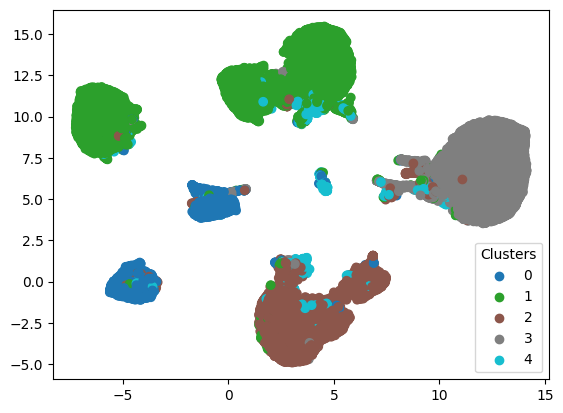

In [23]:
visualize_dimensionality_reduction(umap_embedding, preference_perc['st_kmeans5']) #rs = 4

c:\Users\ritaf\Documentos\Estudos\NovaIMS\Mestrado_GIBI\DM_I\Project_Git\DMI\utils2.py:202: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


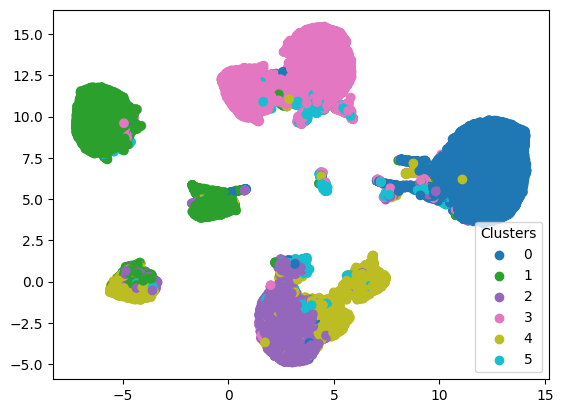

In [ ]:
visualize_dimensionality_reduction(umap_embedding, preference_perc['st_kmeans6']) #rs = 4

c:\Users\ritaf\Documentos\Estudos\NovaIMS\Mestrado_GIBI\DM_I\Project_Git\DMI\utils2.py:202: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


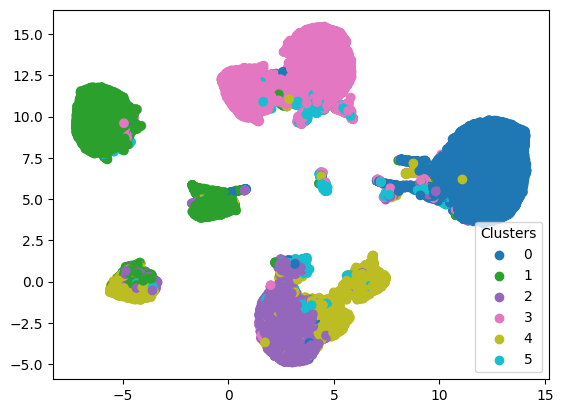

In [ ]:
visualize_dimensionality_reduction(umap_embedding, preference_all['st_kmeans6']) #rs = 4

c:\Users\ritaf\Documentos\Estudos\NovaIMS\Mestrado_GIBI\DM_I\Project_Git\DMI\utils2.py:202: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


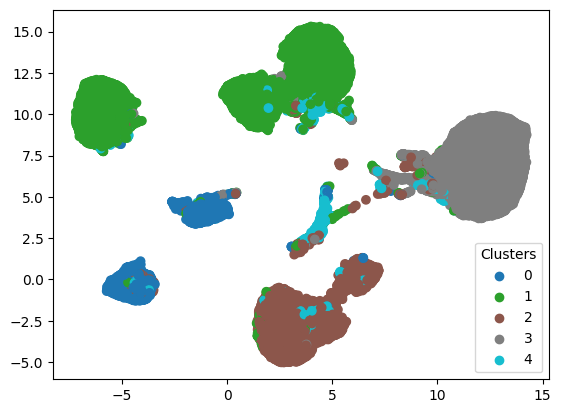

In [ ]:
visualize_dimensionality_reduction(umap_embedding, preference_perc['st_kmeans5'])

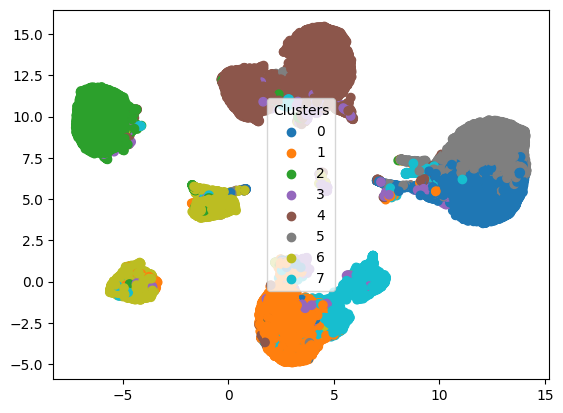

In [24]:
visualize_dimensionality_reduction(umap_embedding, preference_perc['st_kmeans8']) #rs = 4

c:\Users\ritaf\Documentos\Estudos\NovaIMS\Mestrado_GIBI\DM_I\Project_Git\DMI\utils2.py:202: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


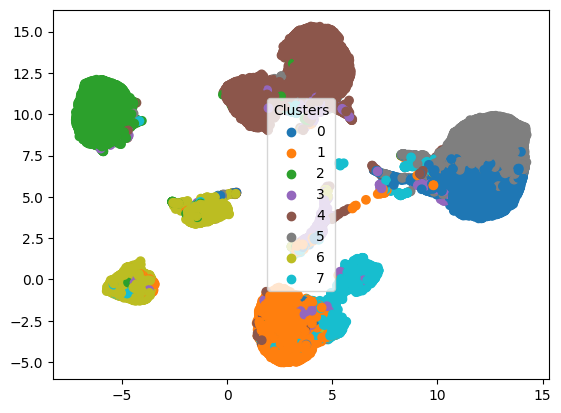

In [ ]:
visualize_dimensionality_reduction(umap_embedding, preference_perc['st_kmeans8'])